# Simple integrations using DNNI

In [1]:
import torch
import torch.autograd as autograd         # computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.ticker
import DNNI
import numpy as np
import time
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Example 1

$$\int x^6 \,dx = x^7/7$$

In [2]:
def f1(x):
    return torch.pow(x[:,[0]],6) #Ex1

In [3]:
x = torch.linspace(-2,2,500).view(-1,1).to(device)
layers = np.array([1,10,10,10,10,10,10,1])
inn = DNNI.DNNI(layers,device)
inn.to(device)
inn.closure(steps=50000,x_train=x,int_f=f1,show=True)

  0%|                                                                                                                                                                    | 18/50000 [00:00<09:45, 85.33it/s]

Iter:  0 Loss:  322.6678582736518  lr:  0.01


 25%|████████████████████████████████████████                                                                                                                        | 12536/50000 [01:05<03:25, 182.12it/s]

Iter:  12500 Loss:  0.004456297389897598  lr:  0.002


 50%|████████████████████████████████████████████████████████████████████████████████                                                                                | 25031/50000 [02:12<01:48, 229.12it/s]

Iter:  25000 Loss:  0.00037772565436513183  lr:  0.0004


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 37536/50000 [03:13<01:09, 180.55it/s]

Iter:  37500 Loss:  0.00015369886384475174  lr:  8e-05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [04:20<00:00, 192.26it/s]

MSE :  0.000104977511162929


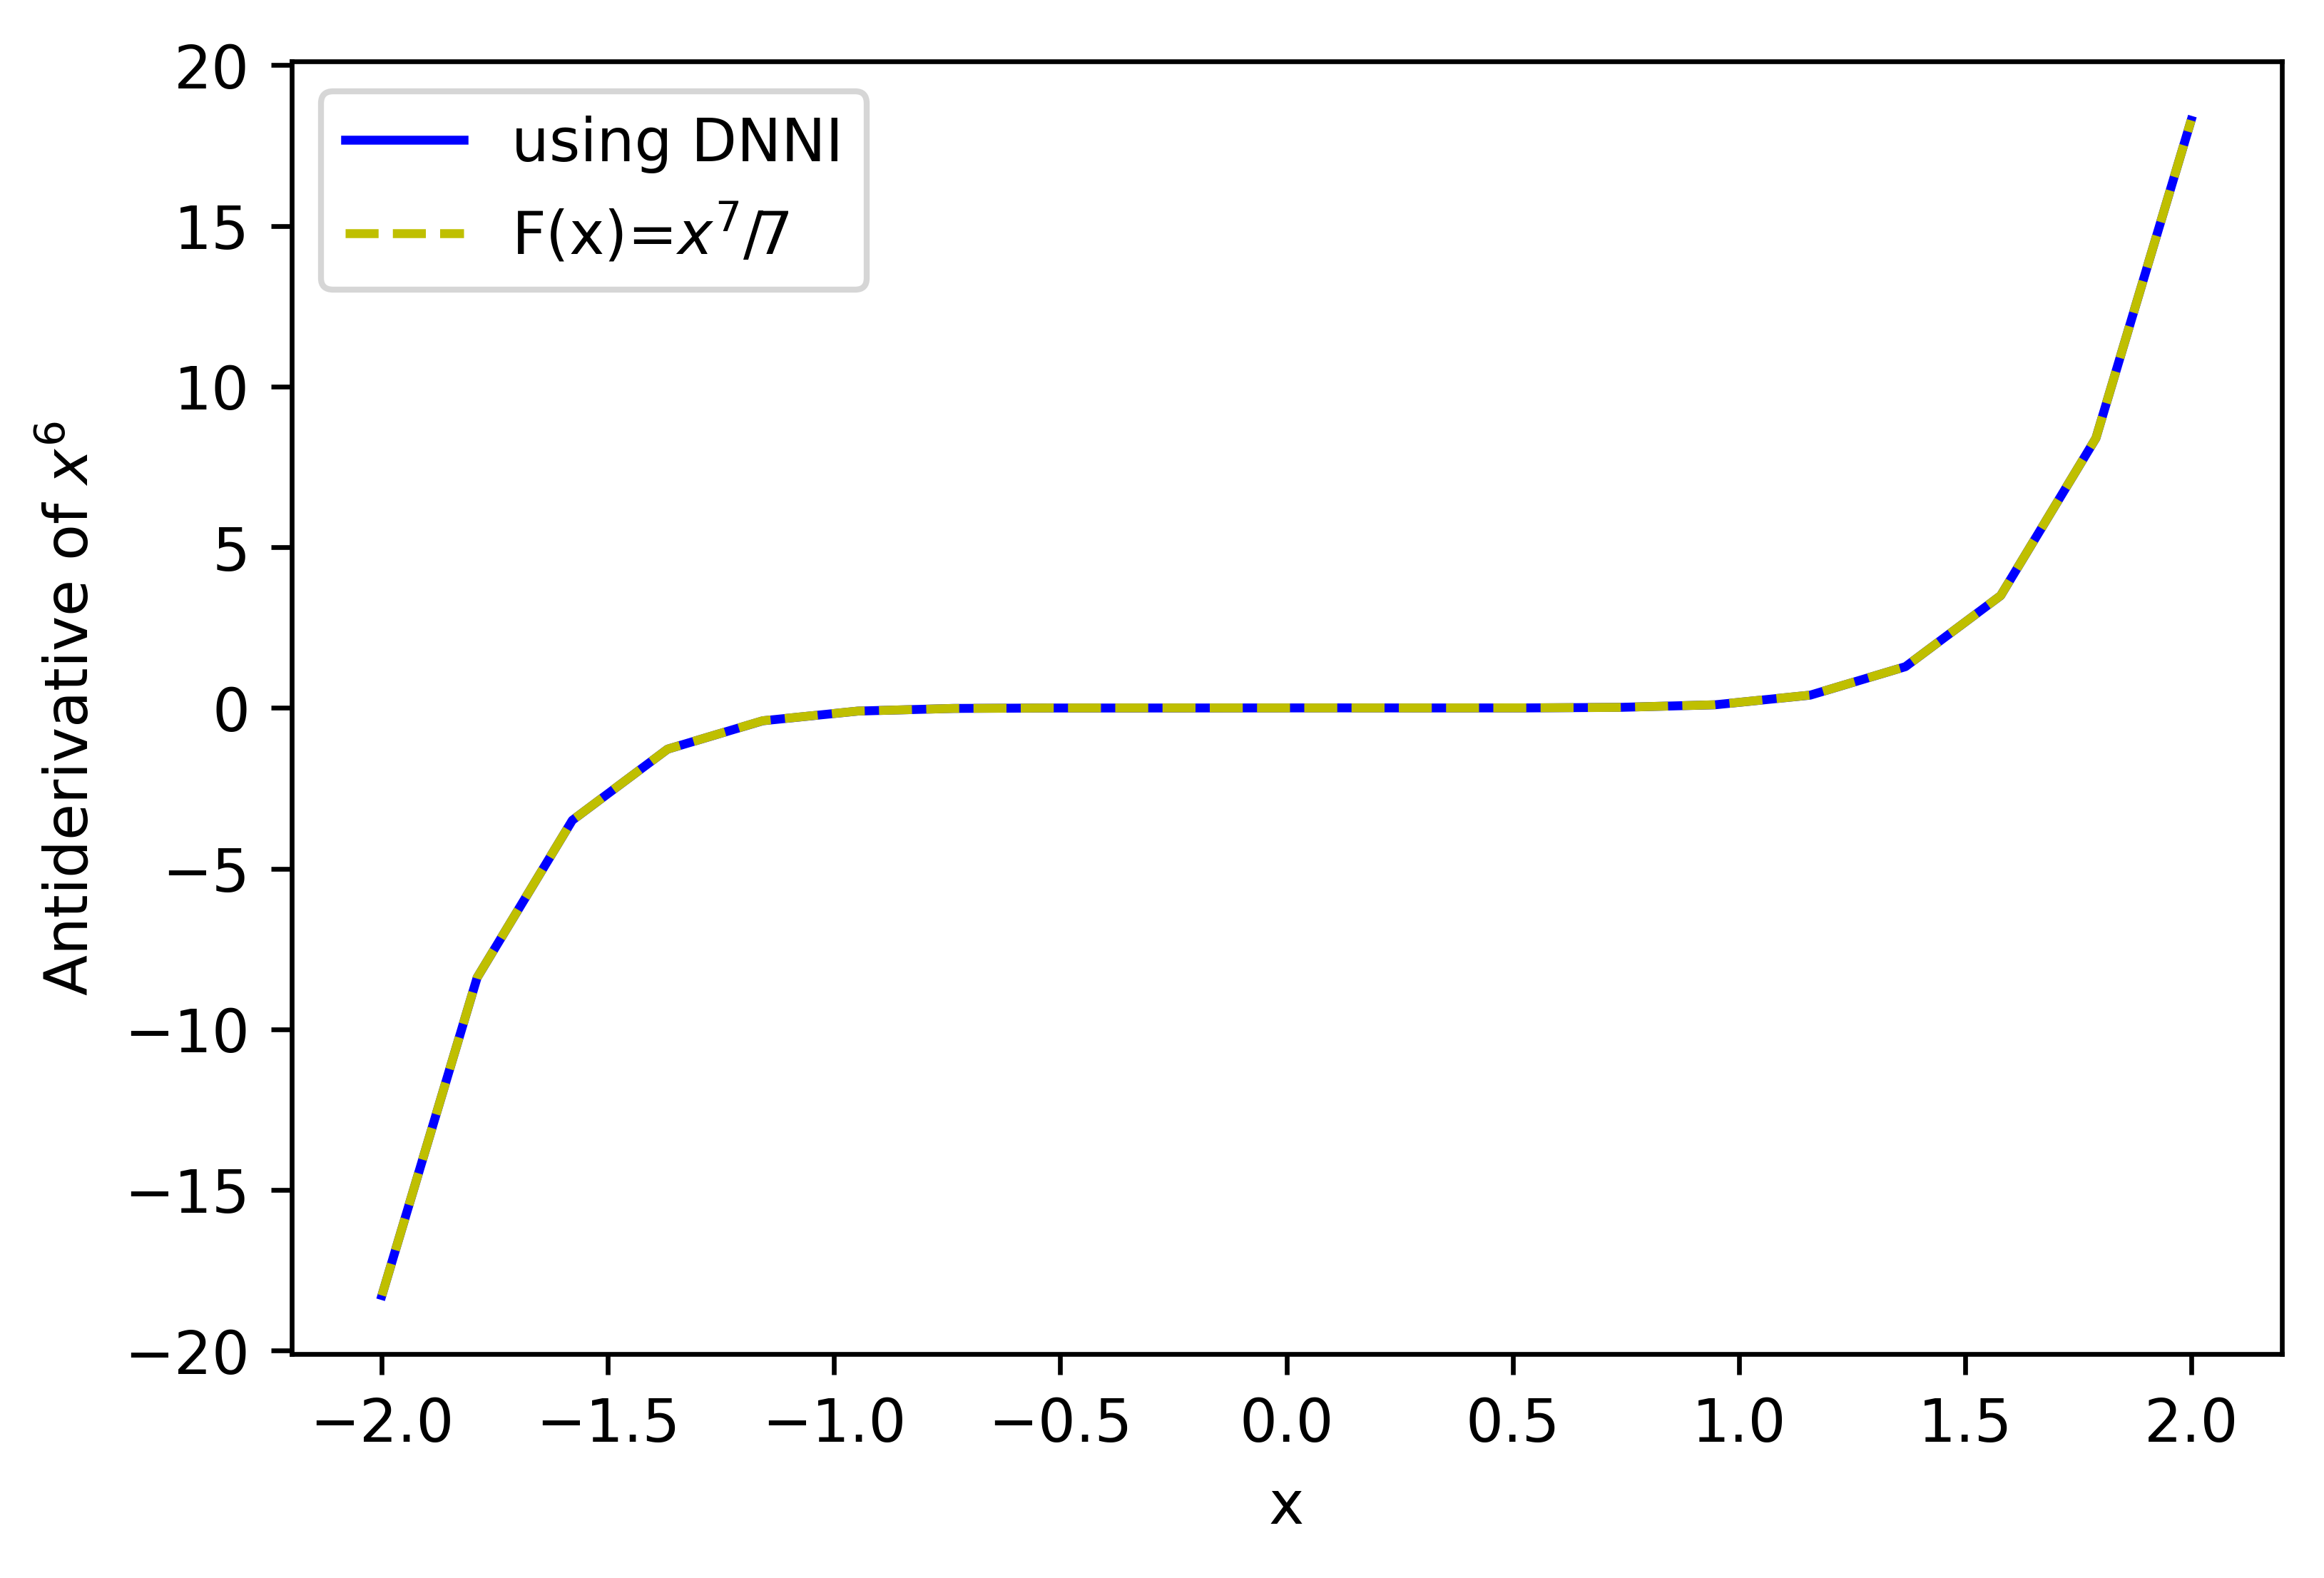

In [5]:
test_zero = torch.zeros(20).view(-1,1)
constants = inn(test_zero)
test_x = torch.linspace(-2,2,20).view(-1,1)
test_y = inn(test_x)
NN_y=test_y-constants
fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')
plt.plot(test_x.detach().numpy()  ,NN_y.detach().cpu().numpy() ,'b-',label='using DNNI')
plt.plot(test_x.detach().numpy()  ,test_x**7/7,'y--',label='F(x)=$x^7$/7')
plt.ylabel('Antiderivative of $x^6$')
plt.xlabel('x')
plt.legend()
#plt.savefig('images/x^6.png',bbox_inches='tight')

# Example 2<br>
I = int(root(1+x^2)

In [6]:
def f2(x):
    return torch.sqrt(1+torch.square(x)) #Ex2 

In [7]:
x = torch.linspace(0,3,500).view(-1,1)
i_hat = torch.zeros(x.shape[0],1).to(device)
layers = np.array([1,10,10,10,10,1])
inn2 = DNNI.DNNI(layers,device)
inn2.to(device)

DNNI(
  (activation): Tanh()
  (loss_function): MSELoss()
  (linears): ModuleList(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [8]:
inn2.closure(steps=10000,x_train=x,int_f=f2,show=True)

  0%|▍                                                                                                                                                                  | 28/10000 [00:00<00:36, 272.57it/s]

Iter:  0 Loss:  3.367695093501943  lr:  0.01


 25%|████████████████████████████████████████▉                                                                                                                        | 2539/10000 [00:08<00:26, 277.38it/s]

Iter:  2500 Loss:  2.7967538001780757e-06  lr:  0.002


 50%|█████████████████████████████████████████████████████████████████████████████████▏                                                                               | 5045/10000 [00:17<00:17, 284.62it/s]

Iter:  5000 Loss:  7.197365595043368e-07  lr:  0.0004


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 7557/10000 [00:26<00:08, 280.19it/s]

Iter:  7500 Loss:  7.88927232077206e-07  lr:  8e-05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:35<00:00, 284.08it/s]

MSE :  1.5909096363499035e-07


In [9]:
test_x1 = torch.linspace(0,3,20).view(-1,1)
test_y1 = inn2(test_x1).detach().cpu().numpy()
int_value = (test_y1[-1]-test_y1[0])
print(int_value)

[5.65264765]


In [10]:
test_zero = torch.zeros(20).view(-1,1)
constants2 = inn2(test_zero).detach().cpu().numpy()
x= torch.linspace(0,3,20)
definite = 1/2*(f2(x)*x + np.arcsinh(x))

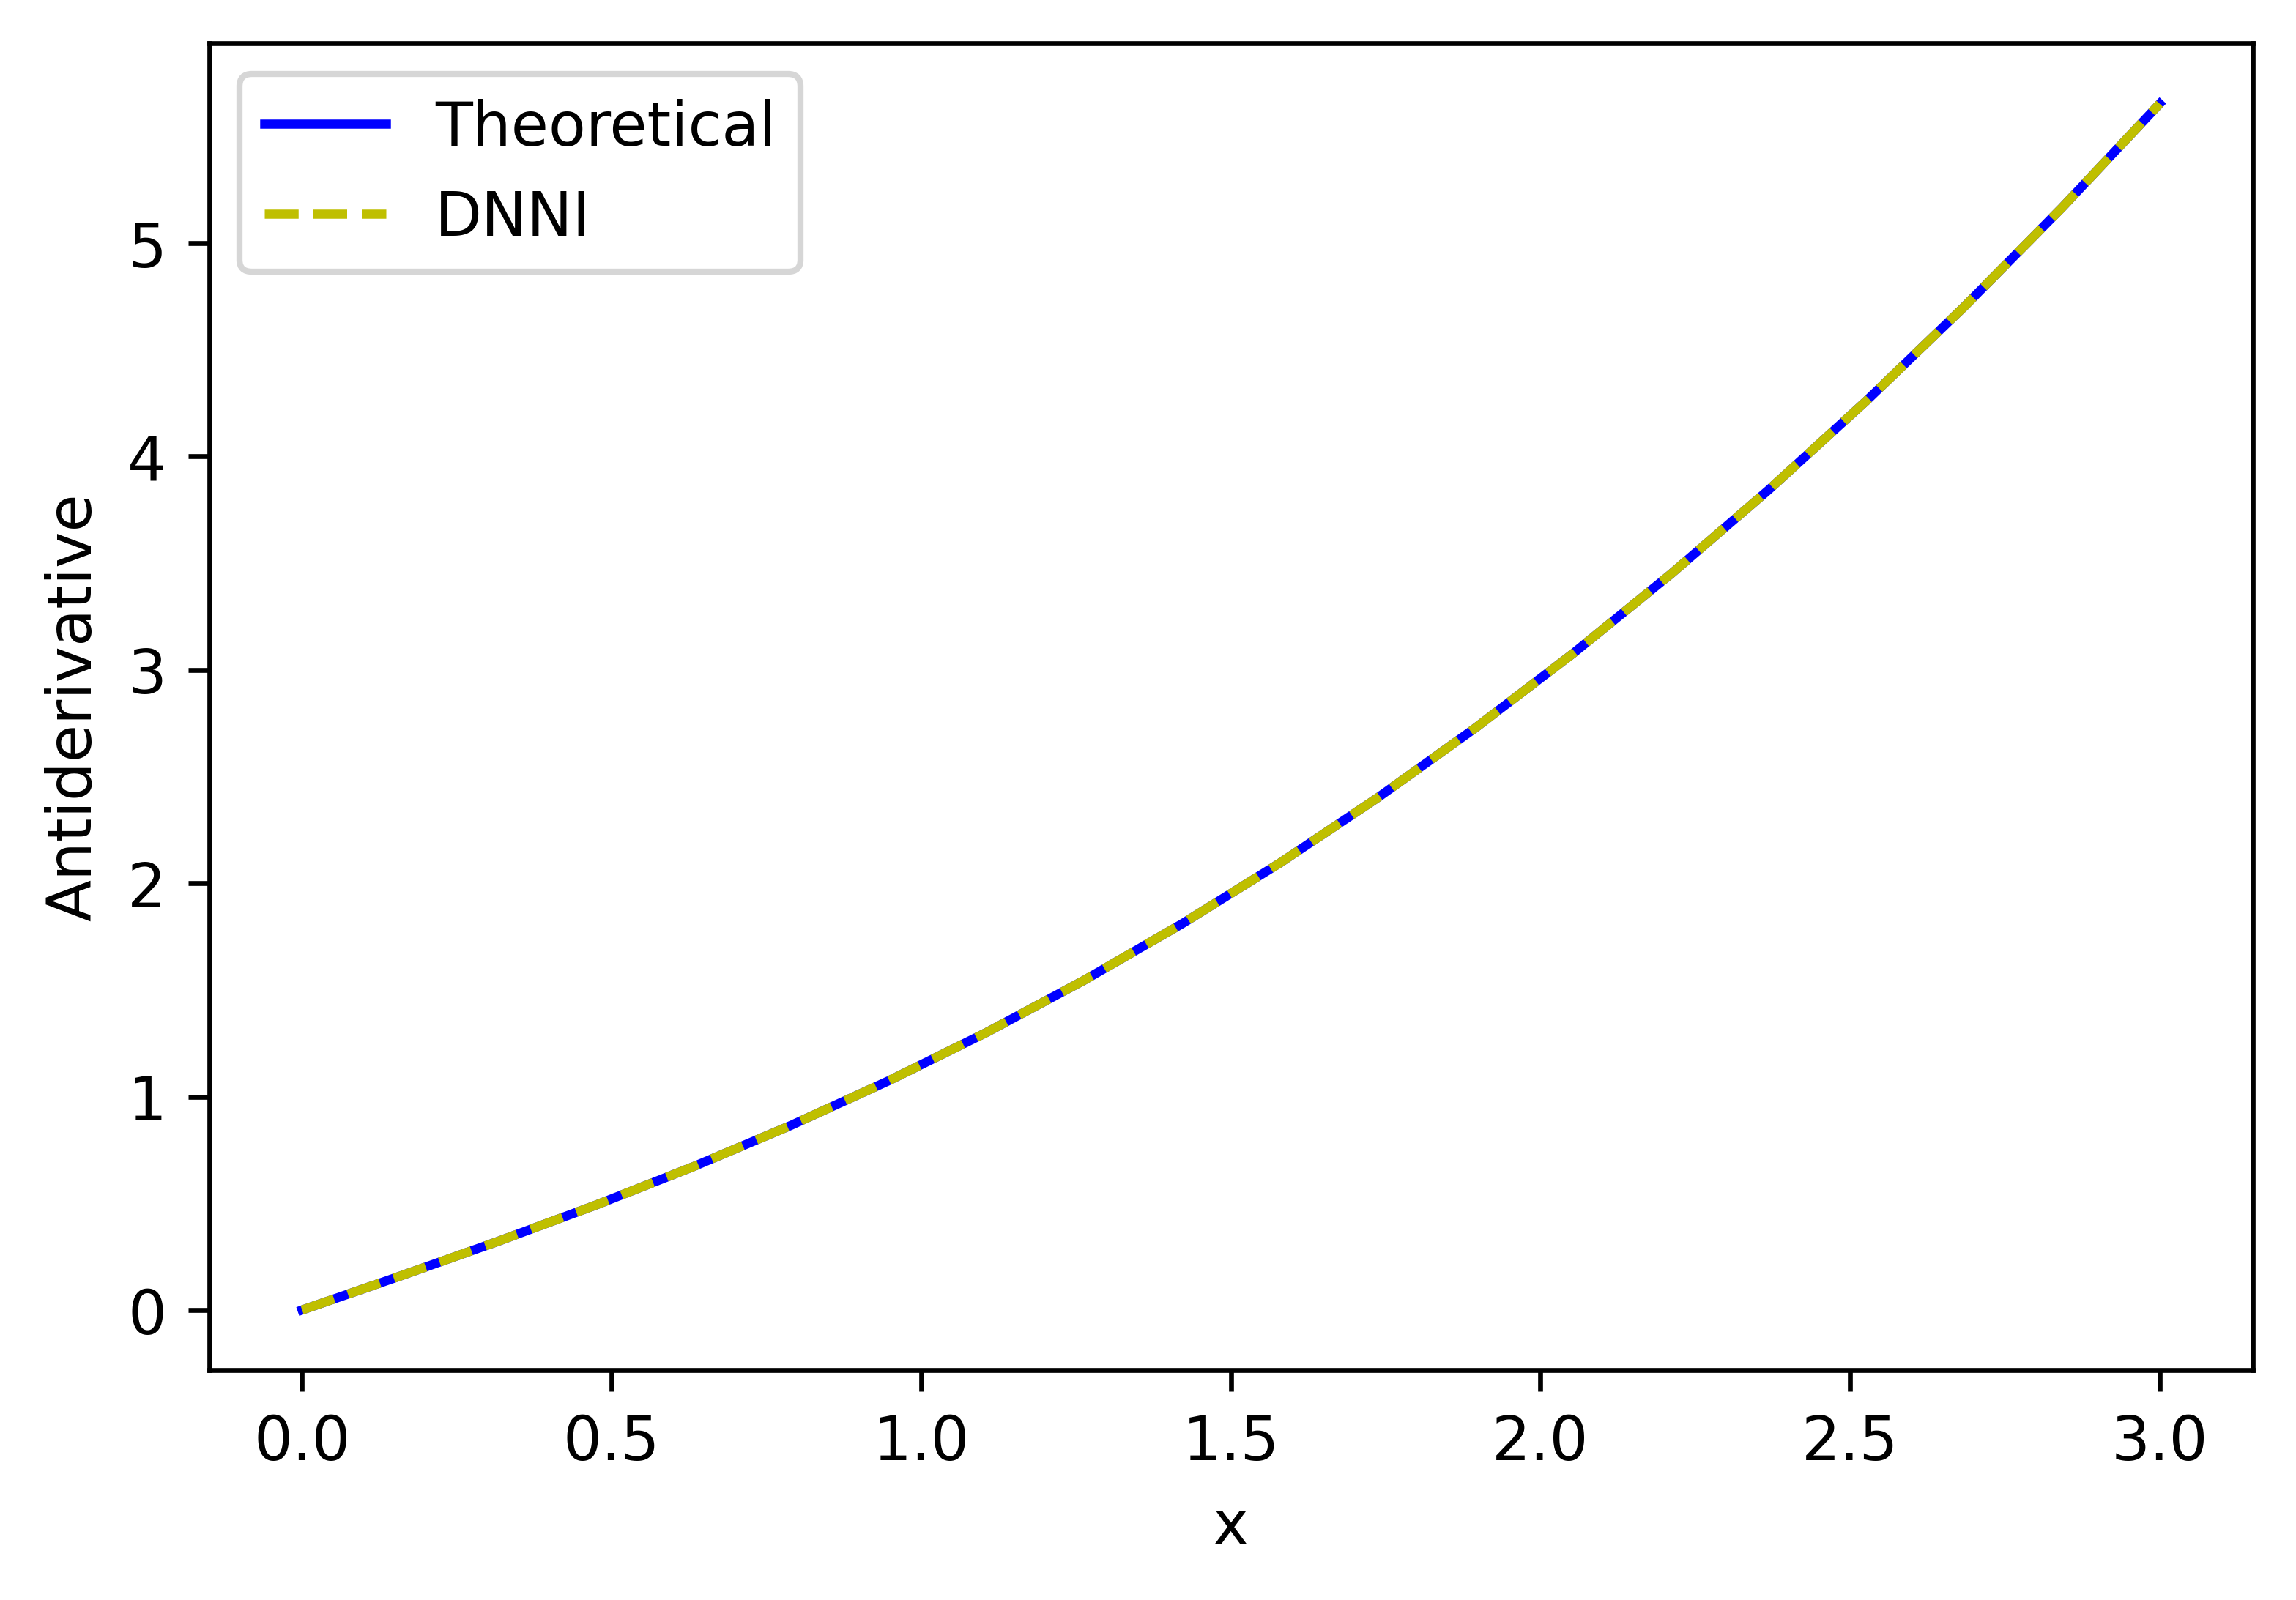

In [11]:
test_def=(test_y1-constants2)
fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')
plt.plot(test_x1,definite,'b-',label='Theoretical')
plt.plot(test_x1,test_def,'y--',label='DNNI')
plt.ylabel('Antiderivative')
plt.xlabel('x')
plt.legend()
#plt.savefig('images/root(1+x^2).png',bbox_inches='tight')

# Example 3

In [12]:
def f3(x):
    return (1+torch.square(torch.cos(x)))/(1+torch.cos(2*x))#Ex3

In [13]:
x = torch.linspace(0,1,1000).view(-1,1)
layers = np.array([1,10,10,10,10,10,1])
inn3 = DNNI.DNNI(layers,device)
inn3.to(device)

DNNI(
  (activation): Tanh()
  (loss_function): MSELoss()
  (linears): ModuleList(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [14]:
inn3.closure(steps=10000,x_train=x,int_f=f3)

  0%|▋                                                                                                                                                                  | 43/10000 [00:00<00:47, 208.56it/s]

Iter:  0 Loss:  2.5898353163749146  lr:  0.01


 25%|████████████████████████████████████████▊                                                                                                                        | 2533/10000 [00:11<00:34, 215.03it/s]

Iter:  2500 Loss:  0.0004737037546999911  lr:  0.002


 50%|████████████████████████████████████████████████████████████████████████████████▉                                                                                | 5024/10000 [00:23<00:22, 217.75it/s]

Iter:  5000 Loss:  1.0356453014215588e-06  lr:  0.0004


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 7525/10000 [00:34<00:11, 219.03it/s]

Iter:  7500 Loss:  4.715456686355611e-07  lr:  8e-05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:46<00:00, 217.12it/s]

MSE :  3.9099057232682363e-07


In [15]:
test_x1 = torch.linspace(0,1,20).view(-1,1)
test_y1 = inn3(test_x1).detach().cpu().numpy()
by_nn = (test_y1-test_y1[0])
actual = 1/2*(test_x1+np.tan(test_x1))

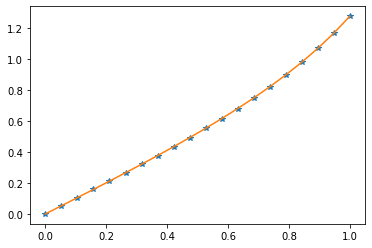

In [16]:
plt.plot(test_x1,by_nn,'*')
plt.plot(test_x1,actual)
plt.show()

# Example 4

In [17]:
def f4(x):
    return x*torch.arctan(torch.square(x)) #Ex4

In [18]:
x = torch.linspace(1,3,1000).view(-1,1)
layers = np.array([1,10,10,10,10,10,1])
inn4 = DNNI.DNNI(layers,device)
inn4.to(device)

DNNI(
  (activation): Tanh()
  (loss_function): MSELoss()
  (linears): ModuleList(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [19]:
inn4.closure(steps=10000,x_train=x,int_f=f4)

  0%|▎                                                                                                                                                                  | 22/10000 [00:00<00:46, 214.96it/s]

Iter:  0 Loss:  8.120263565228846  lr:  0.01


 25%|████████████████████████████████████████▉                                                                                                                        | 2543/10000 [00:11<00:33, 223.82it/s]

Iter:  2500 Loss:  0.0034055219703887094  lr:  0.002


 50%|████████████████████████████████████████████████████████████████████████████████▉                                                                                | 5028/10000 [00:22<00:22, 220.12it/s]

Iter:  5000 Loss:  7.068026366646741e-06  lr:  0.0004


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 7542/10000 [00:33<00:10, 224.60it/s]

Iter:  7500 Loss:  3.731711359515239e-06  lr:  8e-05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 226.79it/s]

MSE :  2.075822705095333e-06


In [20]:
test_zero = torch.zeros(10).view(-1,1)
constants = inn4(test_zero).detach().cpu().numpy()
x= torch.linspace(1,3,10).view(-1,1)
definite = 0.5*np.square(x)*np.arctan(np.square(x))-0.25*np.log(1+np.power(x,4))

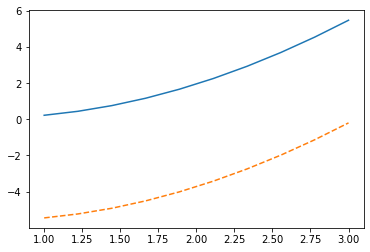

In [22]:
y = inn4(x).detach().cpu().numpy()
plt.plot(x,definite,'-')
plt.plot(x,y,'--')
plt.show()
# uniform difference due to constant of integration

# Example 5

In [23]:
def f5(x):
    return torch.cos(x) #Ex5

In [24]:
x = torch.linspace(0,np.pi,100).view(-1,1)
layers = np.array([1,10,10,10,10,1])
inn5 = DNNI.DNNI(layers,device)
inn5.to(device)

DNNI(
  (activation): Tanh()
  (loss_function): MSELoss()
  (linears): ModuleList(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [25]:
inn5.closure(steps=10000,x_train=x,int_f=f5)

  1%|▉                                                                                                                                                                  | 59/10000 [00:00<00:34, 289.22it/s]

Iter:  0 Loss:  0.3276419061947257  lr:  0.01


 25%|████████████████████████████████████████▊                                                                                                                        | 2537/10000 [00:08<00:26, 286.68it/s]

Iter:  2500 Loss:  1.387609954897607e-06  lr:  0.002


 50%|█████████████████████████████████████████████████████████████████████████████████▎                                                                               | 5047/10000 [00:17<00:17, 285.63it/s]

Iter:  5000 Loss:  2.561814257149339e-05  lr:  0.0004


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 7543/10000 [00:26<00:08, 288.41it/s]

Iter:  7500 Loss:  2.940365600503321e-07  lr:  8e-05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:34<00:00, 287.10it/s]

MSE :  2.57490586241783e-07


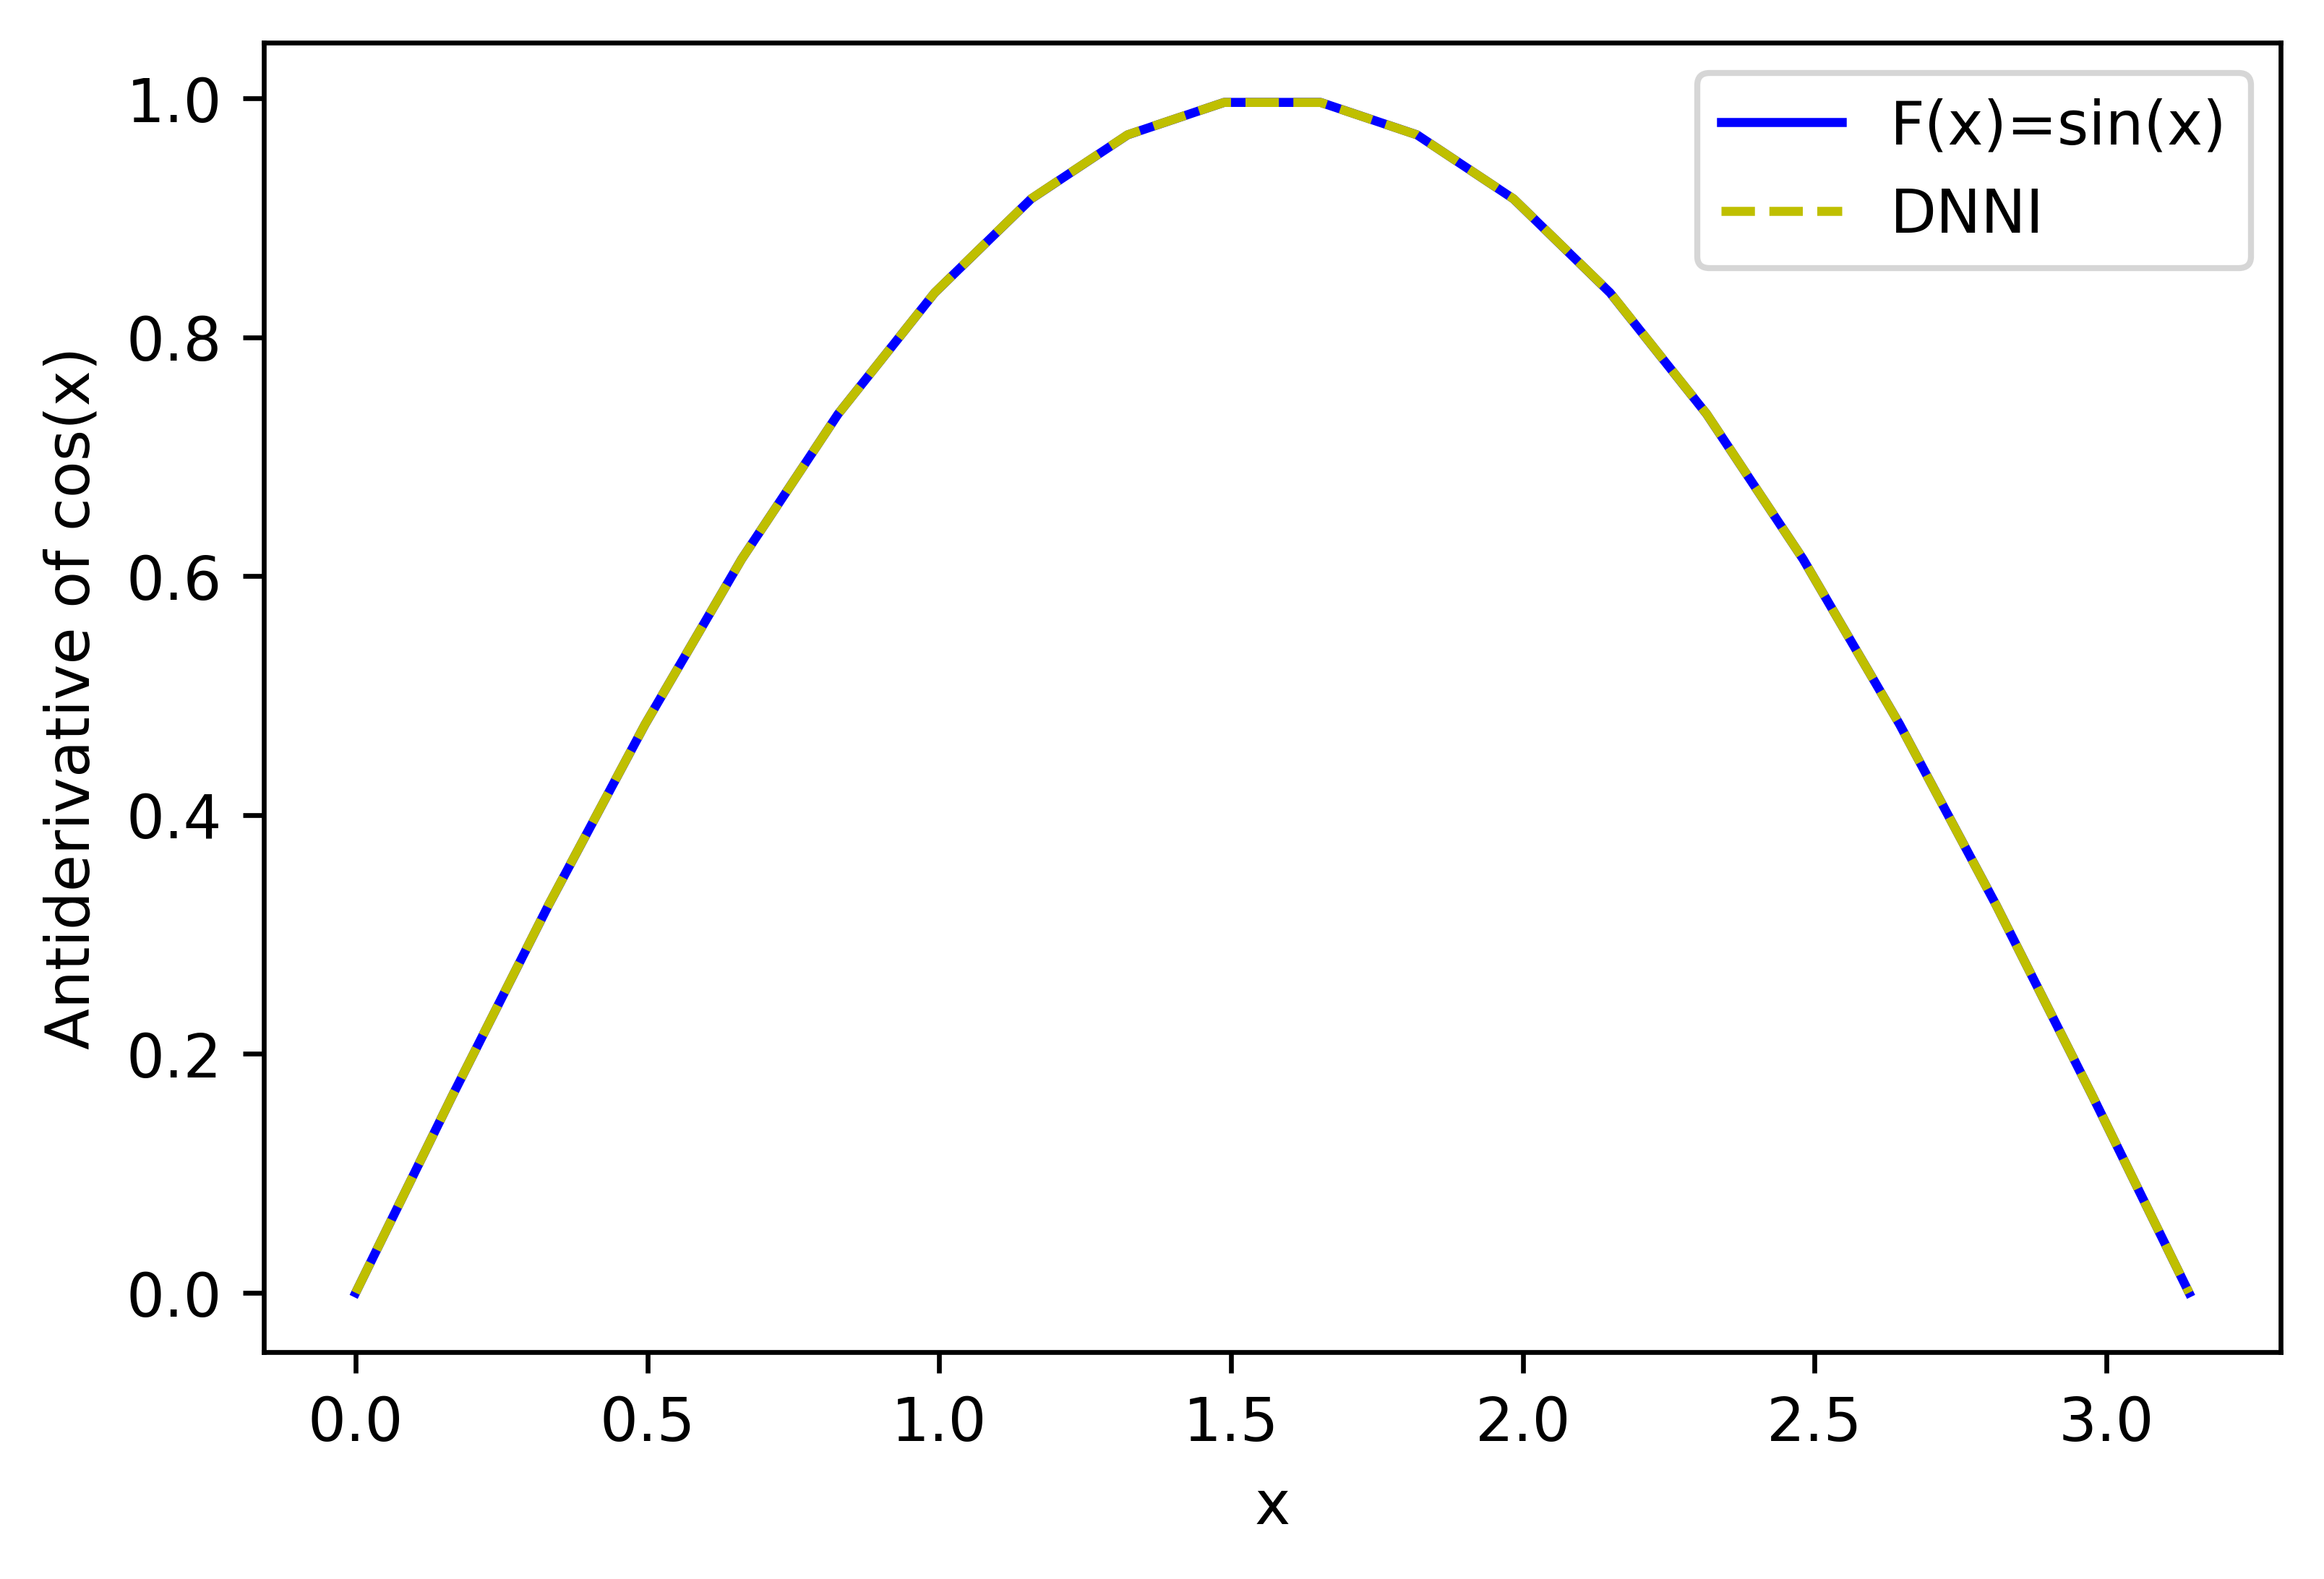

In [26]:
x = np.linspace(0,np.pi,20)[:,None]
test_zero = torch.zeros(20).view(-1,1)
constants5 = inn5(test_zero).detach().cpu().numpy()
test_def=inn5(x).detach().cpu().numpy()-constants5

fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')

plt.plot(x,np.sin(x),'b-',label='F(x)=sin(x)')
plt.plot(x,test_def,'y--',label='DNNI')
plt.ylabel('Antiderivative of cos(x)')
plt.xlabel('x')
plt.legend()
#plt.savefig('images/cos.png',bbox_inches='tight')